In [400]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
import pandas as pd 
from keras.models import Sequential
import random as rd
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
import tensorflow as tf 
from sklearn.datasets import load_sample_image
import cv2
import imghdr

In [401]:
# Remove Improper images
data_dir = 'Data'


In [402]:
# list the directories
os.listdir(os.path.join(data_dir, 'train_f'))

['aug-0-H3_10a_11.jpg.jpg',
 'aug-0-H5_101a_2.jpg.jpg',
 'aug-0-H6_10a_2.jpg.jpg',
 'aug-1-H3_10a_12.jpg.jpg',
 'aug-1-H5_101a_4.jpg.jpg',
 'aug-1-H6_10a_3.jpg.jpg',
 'aug-10-H3_11a_13.jpg.jpg',
 'aug-10-H5_104a_2.jpg.jpg',
 'aug-10-H6_13a_1.jpg.jpg',
 'aug-100-H3_13a_35.jpg.jpg',
 'aug-100-H5_120b_1.jpg.jpg',
 'aug-100-H6_25a_2.jpg.jpg',
 'aug-101-H3_13a_37.jpg.jpg',
 'aug-101-H5_120b_2.jpg.jpg',
 'aug-101-H6_25a_3.jpg.jpg',
 'aug-102-H3_13a_38.jpg.jpg',
 'aug-102-H5_120b_4.jpg.jpg',
 'aug-102-H6_26a_1.jpg.jpg',
 'aug-103-H3_13a_39.jpg.jpg',
 'aug-103-H5_121a_1.jpg.jpg',
 'aug-103-H6_26a_2.jpg.jpg',
 'aug-104-H3_13a_4.jpg.jpg',
 'aug-104-H5_121a_2.jpg.jpg',
 'aug-104-H6_26a_3.jpg.jpg',
 'aug-105-H3_13a_40.jpg.jpg',
 'aug-105-H5_121a_3.jpg.jpg',
 'aug-105-H6_26a_5.jpg.jpg',
 'aug-106-H3_13a_41.jpg.jpg',
 'aug-106-H5_121a_4.jpg.jpg',
 'aug-106-H6_27a_1.jpg.jpg',
 'aug-107-H3_13a_42.jpg.jpg',
 'aug-107-H5_121b_1.jpg.jpg',
 'aug-107-H6_27a_4.jpg.jpg',
 'aug-108-H3_13a_43.jpg.jpg',
 'aug-1

In [403]:
# check for the following image extension
img_exist =['jepeg', 'png', 'jpg','bmp']

In [404]:

#for image_class in os.listdir(data_dir):
 #   for image in os.listdir(os.path.join(data_dir, image_class)):       #loop through every image in the tomato and apple dir
  #      image_path = os.path.join(data_dir, image_class, image)
   #     try:                                                        # check for the various image extesion in the try and except                    
   #         img = cv2.imread(image_path)                    # if it is not in the image 
    #        tip = imghdr.what(image_path)                   # not in the valid image extension
     #       if tip not in img_exist: 
      #          print('Image not in ext list {}'.format(image_path))
       #         os.remove(image_path)                   # remove an image file using its path
      #  except Exception as e:                              
     #       print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [405]:

#load the data

In [406]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 6801 files belonging to 3 classes.


In [407]:
# convert data_fungi into data iterator and helps  to loop in d in batches
data_iterator = data.as_numpy_iterator()
data_iterator


In [408]:
batch =data_iterator.next() # fetch a batch of image/data

In [409]:
batch[0].shape

(32, 256, 256, 3)

In [410]:
batch[1]  # class labels of the image data

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 2])

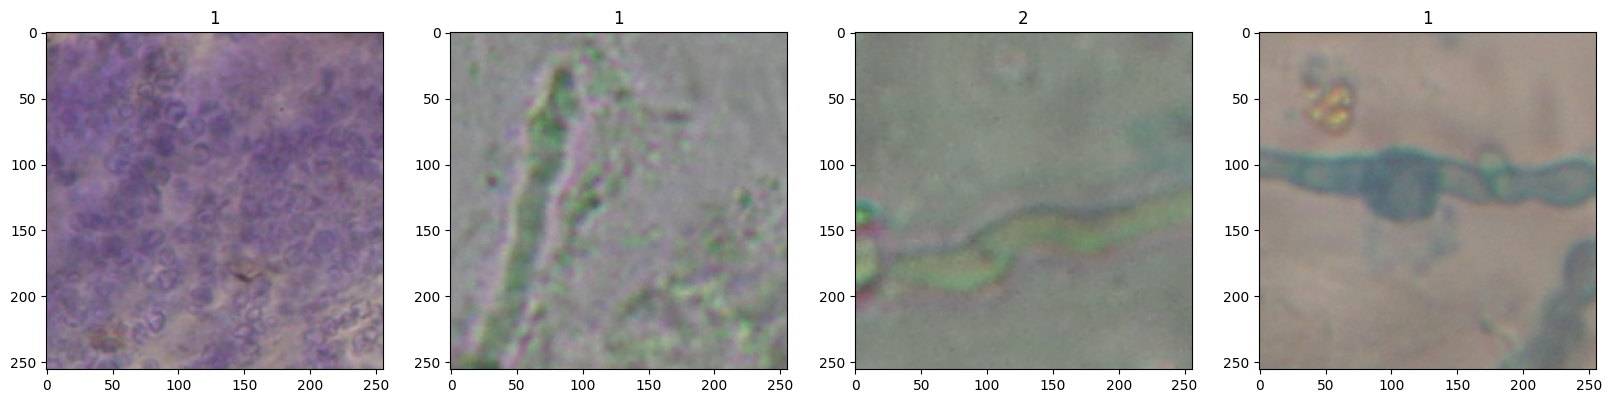

In [411]:
# run the visualization
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [412]:
# 4. Scale Data

In [413]:
oc = batch[0]/255 #this is used to scale the image part of the array[0]
oc

array([[[[0.627451  , 0.49411765, 0.49803922],
         [0.627451  , 0.5004902 , 0.50441176],
         [0.6193628 , 0.49926472, 0.5004902 ],
         ...,
         [0.42745098, 0.3254902 , 0.43382353],
         [0.42818627, 0.3262255 , 0.43995097],
         [0.43137255, 0.32941177, 0.44313726]],

        [[0.61151963, 0.49093136, 0.49166667],
         [0.61410844, 0.49989277, 0.49803922],
         [0.6022365 , 0.49488357, 0.4919271 ],
         ...,
         [0.43163297, 0.33504903, 0.4411918 ],
         [0.4339614 , 0.3351869 , 0.44891238],
         [0.4345588 , 0.33578432, 0.4495098 ]],

        [[0.59166664, 0.5036765 , 0.49289215],
         [0.5904718 , 0.50447303, 0.492693  ],
         [0.5841299 , 0.49842218, 0.49197304],
         ...,
         [0.43007046, 0.3407935 , 0.44474572],
         [0.4277114 , 0.34315258, 0.4514859 ],
         [0.42990196, 0.34534314, 0.45367646]],

        ...,

        [[0.56740195, 0.4862745 , 0.61813724],
         [0.56859684, 0.48846507, 0.6173407 ]

In [414]:
data = data.map(lambda x,y: (x/255, y))  # in the data pipeline, the function map which helps in pulling the transformation from the pipeline. x rep images or variables, 
# y rep target variable or label. always go to tf.data.dataset to see other transformatn other than map. x is scaled bt 0-1

In [415]:
data.as_numpy_iterator().next() # helps to grab our data in batches

(array([[[[0.5647059 , 0.57254905, 0.5686275 ],
          [0.5647059 , 0.57254905, 0.5686275 ],
          [0.56740195, 0.5752451 , 0.5713235 ],
          ...,
          [0.5686275 , 0.5686275 , 0.5764706 ],
          [0.56936276, 0.56936276, 0.5772059 ],
          [0.57254905, 0.57254905, 0.5803922 ]],
 
         [[0.5647059 , 0.57254905, 0.5686275 ],
          [0.5672947 , 0.57513785, 0.5712163 ],
          [0.5683977 , 0.57624084, 0.57231927],
          ...,
          [0.5686275 , 0.5686275 , 0.5764706 ],
          [0.56936276, 0.56936276, 0.5772059 ],
          [0.57254905, 0.57254905, 0.5803922 ]],
 
         [[0.56740195, 0.5752451 , 0.5713235 ],
          [0.5683977 , 0.57624084, 0.57231927],
          [0.5667739 , 0.574617  , 0.57069546],
          ...,
          [0.570481  , 0.570481  , 0.57832414],
          [0.56936276, 0.56936276, 0.5772059 ],
          [0.57254905, 0.57254905, 0.5803922 ]],
 
         ...,
 
         [[0.5620098 , 0.5502451 , 0.5776961 ],
          [0.57037

In [416]:
# 5. Split Data

In [417]:
# check the lenght of our batched data
len(data)


213

In [418]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [419]:
train_size+val_size+test_size

212

In [420]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [421]:
# build the CNN model

In [422]:
model=Sequential()

In [423]:
model.add(Conv2D(32,(3,3) ,activation='relu', input_shape=( 256, 256, 3)))
#model.add(MaxPool2D(  ))
model.add(Dropout(rate=0.2))


In [424]:
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Dropout(rate=0.3))

In [425]:
model.add(Conv2D(20, (3,3), activation='relu'))
model.add(Dropout(rate=0.2))

In [426]:
#output layer
model.add(Flatten())
#model.add(Dense(10, activation ='relu'))
model.add(Dense(1, activation="sigmoid"))

In [427]:
# compile the model

In [428]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 dropout_33 (Dropout)        (None, 254, 254, 32)      0         
                                                                 
 conv2d_40 (Conv2D)          (None, 252, 252, 16)      4624      
                                                                 
 dropout_34 (Dropout)        (None, 252, 252, 16)      0         
                                                                 
 conv2d_41 (Conv2D)          (None, 250, 250, 20)      2900      
                                                                 
 dropout_35 (Dropout)        (None, 250, 250, 20)      0         
                                                                 
 flatten_12 (Flatten)        (None, 1250000)         

In [429]:
model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [430]:
# TRAINING OUR MODEL


In [431]:
logdir="logs"  # CREATE A LOG_2 DIRECTORY

In [432]:
tensorflow_callbacks=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [433]:
# time to train the data
hist = model.fit(train, epochs=6,  validation_data=val, callbacks=[tensorflow_callbacks])
hist

Epoch 1/6
149/149 [==============================] - 1722s 11s/step - loss: 2.2116 - accuracy: 0.7347 - val_loss: 8.0705 - val_accuracy: 0.7351
Epoch 2/6
149/149 [==============================] - 1809s 12s/step - loss: -0.6980 - accuracy: 0.7359 - val_loss: 37.0484 - val_accuracy: 0.7381
Epoch 3/6
149/149 [==============================] - 1768s 12s/step - loss: -12.3637 - accuracy: 0.7353 - val_loss: 140.9003 - val_accuracy: 0.7359
Epoch 4/6
149/149 [==============================] - 2051s 14s/step - loss: 103.8645 - accuracy: 0.7362 - val_loss: 156.6682 - val_accuracy: 0.7351
Epoch 5/6
149/149 [==============================] - 1932s 13s/step - loss: -25.1299 - accuracy: 0.7368 - val_loss: 438.5420 - val_accuracy: 0.7292
Epoch 6/6
149/149 [==============================] - 6254s 42s/step - loss: 15.1268 - accuracy: 0.7351 - val_loss: 770.9426 - val_accuracy: 0.7388


In [434]:
hist.history

{'loss': [2.211561679840088,
  -0.6979879140853882,
  -12.36370849609375,
  103.86453247070312,
  -25.129873275756836,
  15.126845359802246],
 'accuracy': [0.7346895933151245,
  0.7359479665756226,
  0.7353187799453735,
  0.7361577153205872,
  0.7367869019508362,
  0.7351090312004089],
 'val_loss': [8.070490837097168,
  37.04838180541992,
  140.9003448486328,
  156.66815185546875,
  438.5419921875,
  770.942626953125],
 'val_accuracy': [0.7351190447807312,
  0.738095223903656,
  0.7358630895614624,
  0.7351190447807312,
  0.7291666865348816,
  0.7388392686843872]}

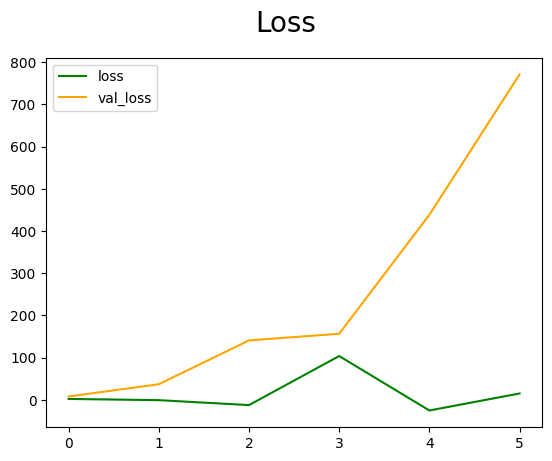

In [435]:
 #PLOT PERFORMANCE
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'] , color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()
 
 
 

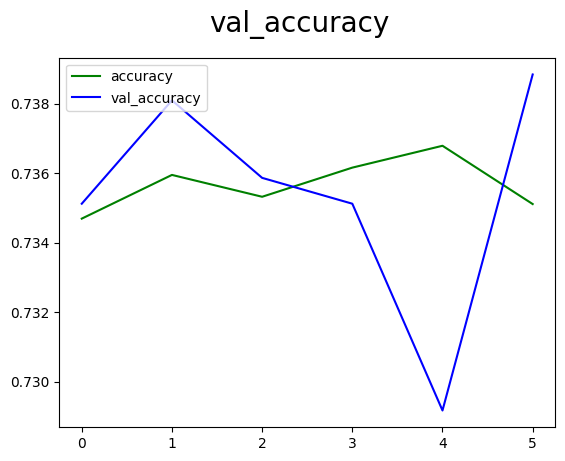

In [436]:
# plot the accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
plt.suptitle('val_accuracy', fontsize=20)
plt.legend(loc='upper left')


In [437]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [438]:
pre=Precision()
re = Recall() 
acc = BinaryAccuracy()

In [439]:
for batch in test.as_numpy_iterator(): # bring back and iteretae throught the batch test file
    X, y =batch # unpack the images and allocate it to X and y
    yhat = model.predict(X)  # make predictions
    pre.update_state(y, yhat) # update between true value, y and predicted value yhat.
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


1/1 [==============================] - 2s 2s/step
Precision:0.8571428656578064, Recall:1.0, Accuracy:0.7395833134651184


In [440]:
# TEST WITH A NEW DATA IMAGE

In [441]:
import cv2 
import numpy as np

In [443]:
img = cv2.imread('train_f.jpg')
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [447]:
#resize = tf.image.resize(img, (256,256))
#plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

NameError: name 'resize' is not defined

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

NameError: name 'resize' is not defined

In [ ]:
if yhat>0.5:
    print(f'predicted class is tomatoes')
else:
    print(f'Predicted class is apple')

In [ ]:
# save the model for future

In [ ]:
from tensorflow.keras.models import load_model 
model.save(os.path.join('Saved_Model','DeepLearning_Apple_tomato_Model.h5')) # h5 is a serialization format

In [ ]:
new_model = load_model(os.path.join('Saved_Model', 'Fungi_classification_model.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))


In [ ]:
if yhatnew>0.5:
    print(f'predicted class h1')
else:
    print(f'Predicted class is ')